In [6]:
import pandas as pd
import numpy as np
import math
import networkx as nx
import matplotlib.pyplot as plt
from sklearn.cross_validation import train_test_split
import heapq
import pickle
%matplotlib notebook

In [2]:
##################### constants
num_movies = 1682
num_features = 19
num_users = 943

In [3]:
###############################  read the user ratings and movie information data ####################
ratings_data =pd.read_csv('F:/Projects/PGM/Movie Recommendation/ml-100k/u_data.csv')
movie_data =pd.read_csv('F:/Projects/PGM/Movie Recommendation/ml-100k/u_items.csv', encoding = "ISO-8859-1")



In [5]:
########################################### Initialize the empty graph ###########################################
conn_graph = nx.Graph() 

################################# create nodes  for movies, features and users  ########################

########## create nodes for users
users = np.unique(ratings_data['user id'])
u_nodes = ["user_" + str(i) for i in users]
u_nodes = pd.DataFrame(u_nodes,index = users)
u_nodes = u_nodes.rename(columns = {0:'n'})


########## create nodes for the movies
movies  = np.unique(ratings_data['item id'])
movie_nodes = ["movie_" + str(i) for i in movies]
movie_nodes = pd.DataFrame(movie_nodes,index = movies)
movie_nodes = movie_nodes.rename(columns = {0:'n'})


########## create nodes for the features
features = np.arange(1,20)
f_nodes = ["feature_" + str(i) for i in features]
f_nodes = pd.DataFrame(f_nodes,index = features)
f_nodes = f_nodes.rename(columns = {0:'n'})


######## user ratings matrix - complete data
user_rat_mat_comp = np.ndarray((num_users,num_movies))

for i in range(0,len(ratings_data)):
  r = ratings_data['user id'][i]
  c = ratings_data['item id'][i]
  user_rat_mat_comp[(r-1),(c-1)] = ratings_data['rating'][i]
user_rat_mat_comp = pd.DataFrame(user_rat_mat_comp)


#################### connect nodes in the graph #############################
for usr in range(0,len(user_rat_mat_comp)): 
  for mvi in range(0,len(user_rat_mat_comp.columns)):
      if(user_rat_mat_comp.ix[usr,mvi] > 0):
            conn_graph.add_edge((u_nodes['n'][usr+1]),(movie_nodes['n'][mvi+1]),weight = user_rat_mat_comp.ix[usr,mvi])


for mvi in range(0,len(movie_feat_mat)): 
  for feat in range(0,len(movie_feat_mat.columns)):
      if(movie_feat_mat.ix[mvi,feat] > 0):
            conn_graph.add_edge((movie_nodes['n'][mvi+1]),(f_nodes['n'][feat+1]))

In [24]:
spring_pos = nx.spring_layout(conn_graph, k = 0.5 ,iterations = 70)

<IPython.core.display.Javascript object>


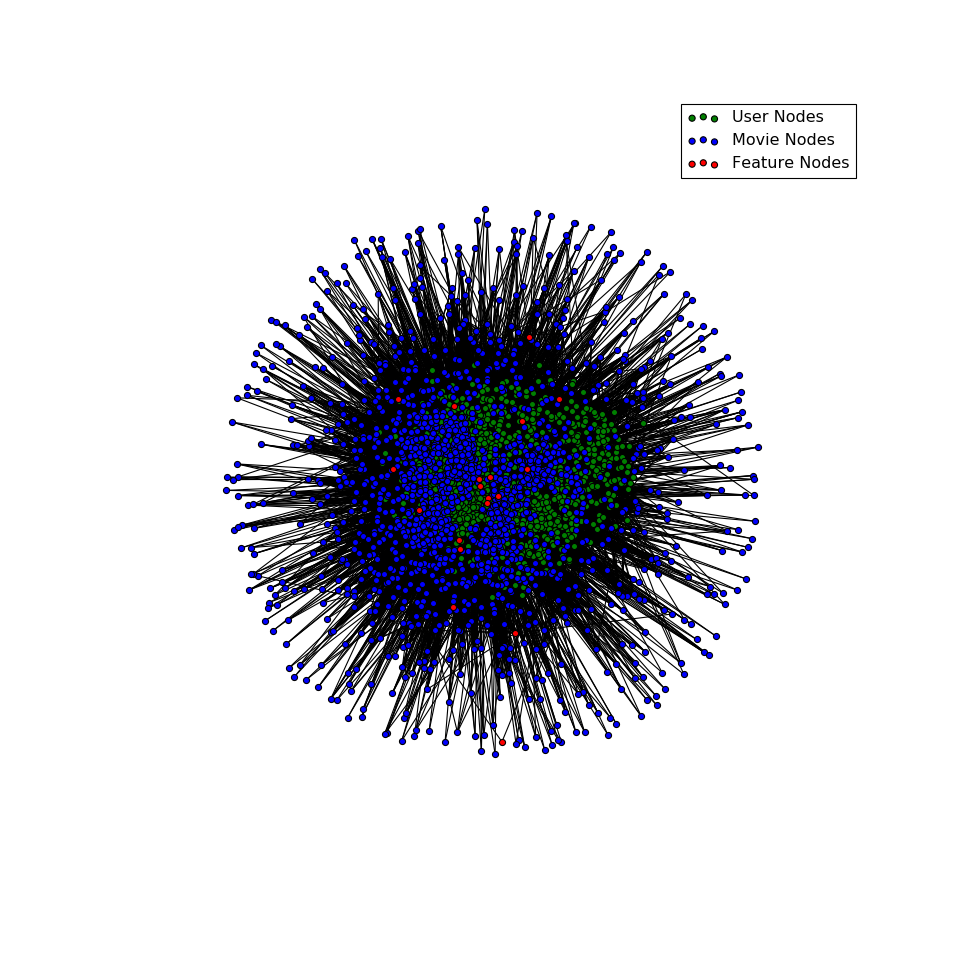

In [66]:
usernodes = [node for node in conn_graph.nodes() if "user" in node]
movienodes = [node for node in conn_graph.nodes() if "movie" in node]
featnodes = [node for node in conn_graph.nodes() if "feature" in node]

fig = plt.figure(figsize=(12, 12)) 
plt.axis("off")

nx.draw_networkx_nodes(conn_graph,pos=spring_pos,nodelist=usernodes, node_color='green', label='User Nodes', node_size = 30)
nx.draw_networkx_nodes(conn_graph,pos=spring_pos,nodelist=movienodes, node_color='blue', label='Movie Nodes', node_size = 30)
nx.draw_networkx_nodes(conn_graph,pos=spring_pos,nodelist=featnodes, node_color='red', label='Feature Nodes', node_size = 30)

nx.draw_networkx_edges(conn_graph, pos = spring_pos)
plt.legend(numpoints = 1)


In [27]:
########Quick snapshot of the Network
print (nx.info(conn_graph))

Name: 
Type: Graph
Number of nodes: 2644
Number of edges: 102893
Average degree:  77.8313


In [26]:
from matplotlib import pyplot, patches

In [28]:
matrix = np.matrix(user_rat_mat_comp)


<IPython.core.display.Javascript object>


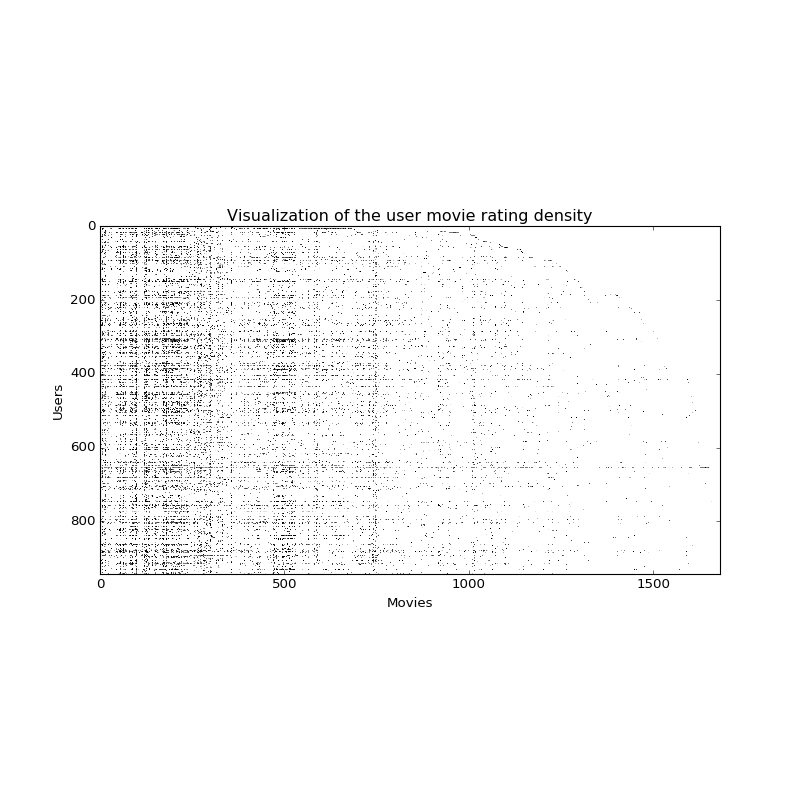

In [70]:
######## Visualize the user movie rating density
fig = pyplot.figure(figsize=(10, 10)) 
pyplot.xlabel("Movies")
pyplot.ylabel("Users")
pyplot.title("Visualization of the user movie rating density")
pyplot.imshow(matrix,cmap="Greys",interpolation="none")


<IPython.core.display.Javascript object>


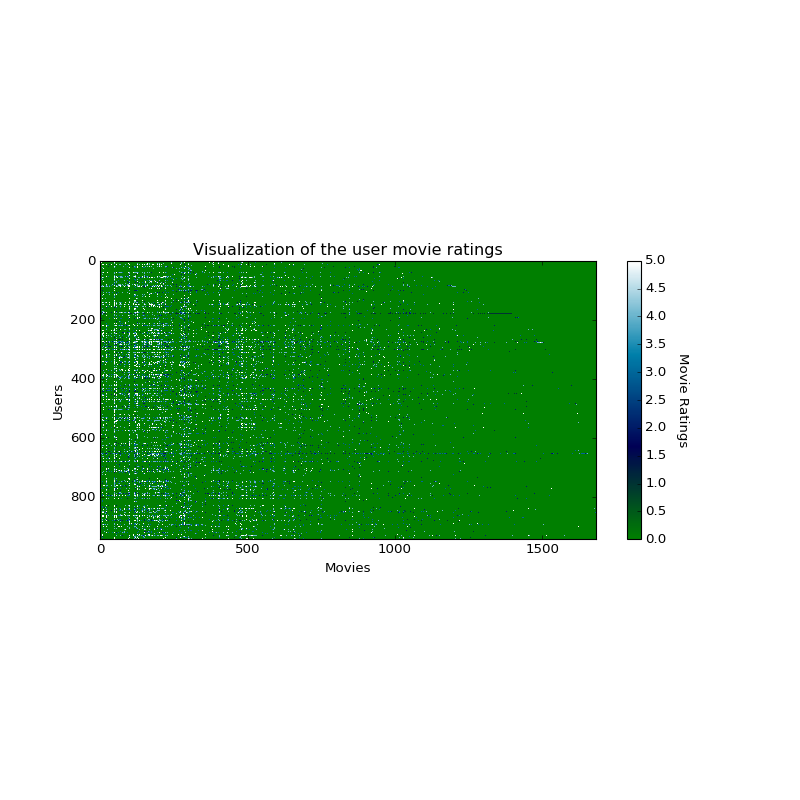

In [53]:
######## Visualize the user movie ratings
fig = pyplot.figure(figsize=(10, 10)) 
ax = fig.add_subplot(1,1,1)
ax.set_aspect('equal')
pyplot.xlabel("Movies")
pyplot.ylabel("Users")
pyplot.title("Visualization of the user movie ratings")
pyplot.imshow(matrix,interpolation='nearest', cmap=pyplot.cm.ocean)
cbar = pyplot.colorbar(fraction = 0.15 , shrink = 0.435)
cbar.set_label('Movie Ratings', rotation=270, labelpad = 20)


<IPython.core.display.Javascript object>


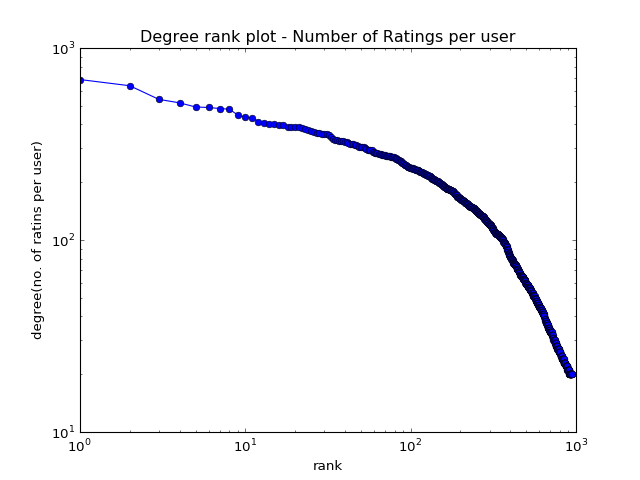

In [85]:
########### Degree rank plot for the user - number of ratings 

degree_sequence=sorted(conn_graph.degree(usernodes).values(),reverse=True) # degree sequence
#print "Degree sequence", degree_sequence
dmax=max(degree_sequence)
fig = plt.figure()
plt.loglog(degree_sequence,'b-',marker='o')
plt.title("Degree rank plot - Number of Ratings per user")
plt.ylabel("degree(no. of ratins per user)")
plt.xlabel("rank")

<IPython.core.display.Javascript object>


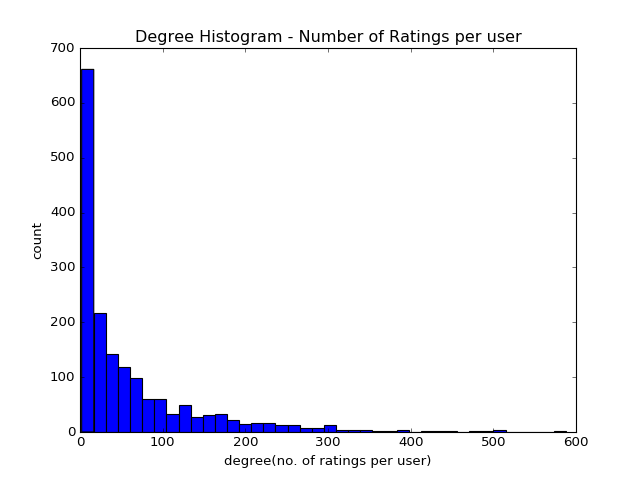

In [84]:
############# Degree histogram for user - number of ratings
fig = plt.figure()
plt.hist(degree_sequence, bins = 40)
plt.title("Degree Histogram - Number of Ratings per user")
plt.ylabel("count")
plt.xlabel("degree(no. of ratings per user)")

<IPython.core.display.Javascript object>


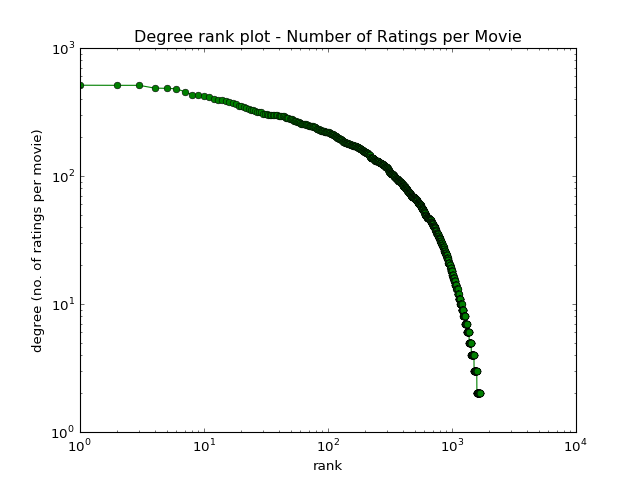

In [82]:
########### Degree rank plot for the movie - number of ratings

degree_sequence=sorted(conn_graph.degree(movienodes).values(),reverse=True) # degree sequence
#print "Degree sequence", degree_sequence
dmax=max(degree_sequence)
fig = plt.figure()
plt.loglog(degree_sequence,'g-',marker='o')
plt.title("Degree rank plot - Number of Ratings per Movie")
plt.ylabel("degree (no. of ratings per movie)")
plt.xlabel("rank")

<IPython.core.display.Javascript object>


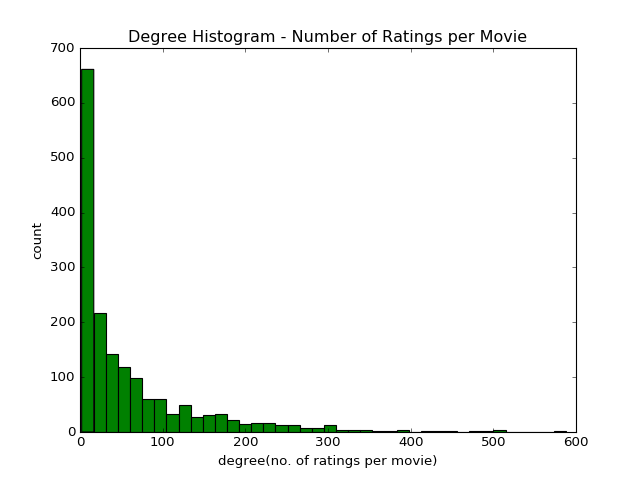

In [83]:
############# Degree histogram for movies - number of ratings
fig = plt.figure()
plt.hist(degree_sequence, bins = 40, color = 'green')
plt.title("Degree Histogram - Number of Ratings per Movie")
plt.ylabel("count")
plt.xlabel("degree(no. of ratings per movie)")

<IPython.core.display.Javascript object>


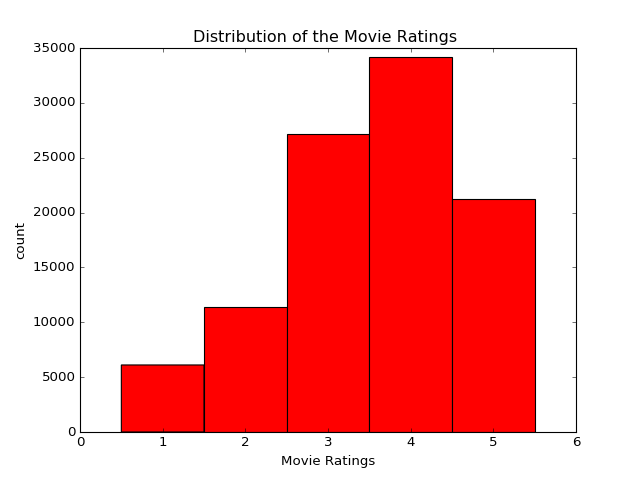

In [17]:
############ visualize the distribution of the ratings
fig = plt.figure()

data = ratings_data['rating']
plt.hist(data , bins=np.arange(data.min(), data.max()+2)-0.5, color = 'red')
plt.title("Distribution of the Movie Ratings ")
plt.ylabel("count")
plt.xlabel("Movie Ratings")

In [4]:
######################### slpit the ratings data into train and test sets
train_1 =pd.read_csv('F:/Projects/PGM/Movie Recommendation/ml-100k/u1.base', encoding = "ISO-8859-1",\
                     sep = '\t', header = None)

test_1 =pd.read_csv('F:/Projects/PGM/Movie Recommendation/ml-100k/u1.test', encoding = "ISO-8859-1",\
                     sep = '\t', header = None)


train_2 =pd.read_csv('F:/Projects/PGM/Movie Recommendation/ml-100k/u2.base', encoding = "ISO-8859-1",\
                     sep = '\t', header = None)

test_2 =pd.read_csv('F:/Projects/PGM/Movie Recommendation/ml-100k/u2.test', encoding = "ISO-8859-1",\
                     sep = '\t', header = None)


train_3 =pd.read_csv('F:/Projects/PGM/Movie Recommendation/ml-100k/u3.base', encoding = "ISO-8859-1",\
                     sep = '\t', header = None)

test_3 =pd.read_csv('F:/Projects/PGM/Movie Recommendation/ml-100k/u3.test', encoding = "ISO-8859-1",\
                     sep = '\t', header = None)


train_4 =pd.read_csv('F:/Projects/PGM/Movie Recommendation/ml-100k/u4.base', encoding = "ISO-8859-1",\
                     sep = '\t', header = None)

test_4 =pd.read_csv('F:/Projects/PGM/Movie Recommendation/ml-100k/u4.test', encoding = "ISO-8859-1",\
                     sep = '\t', header = None)


train_5 =pd.read_csv('F:/Projects/PGM/Movie Recommendation/ml-100k/u5.base', encoding = "ISO-8859-1",\
                     sep = '\t', header = None)
test_5 =pd.read_csv('F:/Projects/PGM/Movie Recommendation/ml-100k/u5.test', encoding = "ISO-8859-1",\
                     sep = '\t', header = None)


train_1.columns = ratings_data.columns
train_2.columns = ratings_data.columns
train_3.columns = ratings_data.columns
train_4.columns = ratings_data.columns
train_5.columns = ratings_data.columns

test_1.columns = ratings_data.columns
test_2.columns = ratings_data.columns
test_3.columns = ratings_data.columns
test_4.columns = ratings_data.columns
test_5.columns = ratings_data.columns


In [ ]:
####################Initialize the predicted arrays
predicted_n10 = np.zeros((5,2000))
predicted_n20 = np.zeros((5,2000))
predicted_n30 = np.zeros((5,2000))
predicted_n50 = np.zeros((5,2000))

expected = np.zeros((5,2000))


In [ ]:
################## 5 fold cross validation
for m in range(0,5):

  if(m == 0): 
    ratings_train = train_1
    ratings_test = test_1
  elif(m == 1):
    ratings_train = train_2
    ratings_test = test_2
  elif(m == 2):
    ratings_train = train_3
    ratings_test = test_3
  elif(m == 3):
    ratings_train = train_4
    ratings_test = test_4
  else:  
    ratings_train = train_5
    ratings_test = test_5
  
  
  

  ######################### create the user ratings and movie features matrices #######################
  movie_feat_mat = movie_data.drop(movie_data.columns[[ 1,2,3]], axis=1)
  movie_feat_mat.drop(movie_feat_mat.columns[[0]], axis=1, inplace=True)

  user_rat_mat = np.ndarray((num_users,num_movies))

  for i in range(0,len(ratings_train)):
    r =ratings_train['user id'][i]
    c = ratings_train['item id'][i]
    user_rat_mat[(r-1),(c-1)] = ratings_train['rating'][i]
  user_rat_mat = pd.DataFrame(user_rat_mat) 


#  ########### find the users similar to the active user , based on new measure  #################
  sim = np.zeros((len(user_rat_mat),len(user_rat_mat)))
 

  for  active_user  in  range(0,len(user_rat_mat)):
   
     item_rat_act_user = np.nonzero(user_rat_mat.ix[active_user,:])[0]
   
     for usr in range(0,len(user_rat_mat)):
        itms_rat_usr = np.nonzero(user_rat_mat.ix[usr,:])[0]
        rat_both = np.intersect1d(item_rat_act_user,itms_rat_usr)
                 
        if(len(rat_both) > 0):
           count = 0
           for item in rat_both:
              cond1 = (user_rat_mat.ix[active_user,item] + user_rat_mat.ix[usr,item]) <= 4 
              cond2 = (user_rat_mat.ix[active_user,item] + user_rat_mat.ix[usr,item]) >= 8 
              if(cond1 or cond2):
                  count = count + 1
               
           sim[active_user][usr] =  count
             
        
        
        
###############################################################################################################

  samp = random.sample(range(0,20000),2000)
  expected[m] = ratings_test['rating'][samp]
#  expected.index = range(0,2000)
  

   ####### iterate over the test ratings set
  t = 0
  for k in samp:
    ################# create random variables for storing pobabilities for features, items and users #######
    feat_prob = np.zeros((num_features,2))
    item_prob= np.zeros((num_movies,2))
    user_prob = np.zeros((num_users,6))
    a_cb_prob =  np.zeros(6)
    a_cf_prob =  np.zeros(6)
    a_h_prob =  np.zeros(6)

    ############### create nodes names  #################################################################
    feat_nodes = ["feat_" + str(i) for i in range(0,num_features)]
    item_nodes = ["item_" + str(i) for i in range(0, num_movies)]
    user_nodes = ["user_" + str(i) for i in range(0, num_users)]


    ############################## set the active user ######################################################
    active_user = (ratings_test['user id'][k]) - 1


    ######################### create the static part of the Bayesian Netwotk for the active user ##############
    bn = nx.DiGraph()


    ########################## add all the feature nodes to the Bayesian network  ############################
    for i in range(0,num_features):
      bn.add_node(feat_nodes[i],prob = feat_prob[i])


    ######################### assign the a priori probabilities to the feature nodes ########################
    for i in range(0,num_features):
      num = np.nonzero(movie_feat_mat.ix[:,i])[0]
      bn.node[feat_nodes[i]]['prob'][1] = len(num) / num_movies
      bn.node[feat_nodes[i]]['prob'][0] = 1 - bn.node[feat_nodes[i]]['prob'][1]


    ####################### add the relevant item nodes , corresponding to the movies rates by the active user
    item_rat_act_user = np.nonzero(user_rat_mat.ix[active_user,:])[0] ## items rated by the active user

    for itm in item_rat_act_user:
      bn.add_node(item_nodes[itm],prob = item_prob[itm])



    ##################### add edges from the feature nodes to the item nodes ##################################
    for itm in item_rat_act_user:
        parents =  np.nonzero(movie_feat_mat.ix[itm,:])[0]
        for ft in parents:
           bn.add_edge(feat_nodes[ft],item_nodes[itm])



    ################### add a node for A_CB and  edges from all the item nodes to the A_CB node #################
    bn.add_node("a_cb",prob = a_cb_prob)
    for itm in item_rat_act_user:
        bn.add_edge(item_nodes[itm],"a_cb")


    users_sim_act_user = heapq.nlargest(50, range(len(sim[active_user])), sim[active_user].take)  ##### select the top 30 similar users 

            
    ##################### add the similar nodes to the Bayes Network #############################################
    for usr in users_sim_act_user:   #### add the similar users to the BN
      bn.add_node(user_nodes[usr],prob = user_prob[usr])


    bn.add_node("a_cf",prob = a_cf_prob)  ###### add a node for A_CF 


    for usr in  users_sim_act_user:     ####### add an edge from every similar item to A_CF
        bn.add_edge(user_nodes[usr],"a_cf")


    ########################## add a node for the Hybrid part to collect info from both CB and CF parts  ##########
    bn.add_node("a_h",prob = a_h_prob)

    bn.add_edge("a_cb","a_h")
    bn.add_edge("a_cf","a_h")



    ############################# Expand the BN by adding the target item node #####################################
    target_item = (ratings_test['item id'][k]) - 1
    par_target_item = np.nonzero(movie_feat_mat.ix[target_item,:])[0]

    bn.add_node(item_nodes[target_item],prob = item_prob[target_item])  #### add the targer item

    for feat in par_target_item:                  ##### add edges from the features describing it 
      bn.add_edge(feat_nodes[feat],item_nodes[target_item])    

    new_item_set = np.append(item_rat_act_user,target_item)



    ######################### Expand the BN by adding edges from items to U- #####################################
    u_minus = list() 
 
    for usr in users_sim_act_user:              ####### identify the user nodes in U-
      if(user_rat_mat.ix[usr,target_item] == 0 ):
            u_minus.append(usr)

    for usr in u_minus:                         ####### add edges from items to the users in U-
      par = np.nonzero(user_rat_mat.ix[usr,:])[0]
      for itm in par:
          bn.add_node(item_nodes[itm],prob = item_prob[itm])
          bn.add_edge(item_nodes[itm],user_nodes[usr])
          if((item_nodes[itm] in bn.nodes()) == False):
              par_feat = np.nonzero(movie_feat_mat.ix[itm,:])[0]
              for feat in par_feat:
                  bn.add_edge(feat_nodes[feat],item_nodes[itm])

        


    ############################ Set the item evidence by instantiating the target item #############################
    bn.node[item_nodes[target_item]]['prob'][1] = 1
    bn.node[item_nodes[target_item]]['prob'][0] = 0



    ############################# Propagate the item evidence to the parent features ############################# 
    par_item_evid = np.nonzero(movie_feat_mat.ix[target_item,:])[0]

    M = 0
    for feat in par_item_evid:
      nk = len(np.nonzero(movie_feat_mat.ix[:,feat])[0])
      M = M + math.log((num_movies/nk) + 1) 
   
    Pr_itm = 0   
    for feat in par_item_evid:
        wt = math.log((num_movies/nk) + 1) * (1/M)
        Pr_itm = Pr_itm + (bn.node[feat_nodes[feat]]['prob'][1]) * wt
   
    for feat in par_item_evid:
        wt = math.log((num_movies/nk) + 1) * (1/M)
        add = ( wt* (bn.node[feat_nodes[feat]]['prob'][1]) * (1 - bn.node[feat_nodes[feat]]['prob'][1]) ) / Pr_itm
        bn.node[feat_nodes[feat]]['prob'][1] = bn.node[feat_nodes[feat]]['prob'][1] + add
        bn.node[feat_nodes[feat]]['prob'][0] = 1 -  bn.node[feat_nodes[feat]]['prob'][1] 




    ############################### set the collaborative user evidence ########################################
    for usr in users_sim_act_user:
      if( (usr in u_minus) == False ):
          rat = user_rat_mat.ix[usr,target_item]
          for i in range(0,6):
              if(rat == i):
                  bn.node[user_nodes[usr]]['prob'][i] = 1
              else:
                  bn.node[user_nodes[usr]]['prob'][i] = 0



    ########################### Propagate the evidence from the features to the items ##########################
    for i in range(0,len(item_nodes)):
        if( item_nodes[i] in bn.nodes()):
            item_prob_func(i)


    ####################### Propagate evidence to user nodes from items  ######################################
    for usr in u_minus:
      for i in range(0,6):
        user_prob_func(usr,i)

    #######################  Propagate evidence to a_cb node from items ######################################
    for i in range(0,6):
        acb_prob_func(i)


    ######################## Propogate evidence from users to a_cf ##########################################
    tot_sim = 0
    for i in users_sim_act_user:
        tot_sim = tot_sim + sim[active_user][i]

    for i in range(0,6):
        cf_prob_func(i)


    ###################### combining the evidence from the content based and collaborative parts ###########
    alpha = bn.node["a_cf"]['prob'][0]
  
    rating_cb = np.zeros(5)
    for h in range(0,5):
        rating_cb[h] = (bn.node["a_cb"]['prob'][h+1])/(1 - bn.node["a_cb"]['prob'][0])
      
    rating_cf = np.zeros(5)
    for h in range(0,5):
        rating_cf[h] = (bn.node["a_cf"]['prob'][h+1])/(1 - bn.node["a_cf"]['prob'][0])
  
    cb_pred = 0

    if( (rating_cb[0] >= 0.5) and ( np.sum(rating_cb[0:5]) >= 0.5 ) ):
        cb_pred = 1
    elif( (np.sum(rating_cb[0:2]) >= 0.5) and ( np.sum(rating_cb[1:5]) >= 0.5 ) ):
        cb_pred = 2
    elif( (np.sum(rating_cb[0:3]) >= 0.5) and ( np.sum(rating_cb[2:5]) >= 0.5 ) ):
        cb_pred = 3
    elif( (np.sum(rating_cb[0:4]) >= 0.5) and ( np.sum(rating_cb[3:5]) >= 0.5 ) ):
        cb_pred = 4
    else:
        cb_pred = 5 
          
   
    cf_pred = 0
  
    if( (rating_cf[0] >= 0.5) and ( np.sum(rating_cf[0:5]) >= 0.5 ) ):
        cf_pred = 1
    elif( (np.sum(rating_cf[0:2]) >= 0.5) and ( np.sum(rating_cf[1:5]) >= 0.5 ) ):
        cf_pred = 2
    elif( (np.sum(rating_cf[0:3]) >= 0.5) and ( np.sum(rating_cf[2:5]) >= 0.5 ) ):
        cf_pred = 3
    elif( (np.sum(rating_cf[0:4]) >= 0.5) and ( np.sum(rating_cf[3:5]) >= 0.5 ) ):
        cf_pred = 4
    else:
        cf_pred = 5       
  
  
    rating_h = np.zeros(5)
  
    if(cb_pred == cf_pred):
        for i in range(0,5):
           if(i == (cb_pred-1)):      
             rating_h[i] = 1
           else:
             rating_h[i] = 0
    else:
        for i in range(0,5):
            if(i == (cb_pred-1)):
                rating_h[i] = alpha
            elif(i == (cf_pred-1)):
                rating_h[i] = (1-alpha)
            else:
                rating_h[i] = 0
  
 
  
    predicted_n50[m,t] = (np.argmax(rating_h)) + 1  
    t = t+1

In [38]:
# Getting back the objects:
#with open('F:/Projects/PGM/Movie Recommendation/python/results_pcc.pickle','rb') as f:  # Python 3: open(..., 'rb')
#    mad_n10, mad_inst_n10,mad_n20, mad_inst_n20,mad_n30, mad_inst_n30,mad_n50, mad_inst_n50 = pickle.load(f)

with open('F:/Projects/PGM/Movie Recommendation/python/results_new.pickle','rb') as f:  # Python 3: open(..., 'rb')
    mad_n10n, mad_inst_n10n,mad_n20n, mad_inst_n20n,mad_n30n, mad_inst_n30n,mad_n50n, mad_inst_n50n = pickle.load(f)

In [ ]:
######################### Number of neighbors = 10
mad_n10 = np.zeros(5)
for j in range(0,5):
  for i in range(0,2000):
    mad_n10[j] = mad_n10[j] + abs(predicted_n10[j,i] - expected[j,i] )

  mad_n10[j] = mad_n10[j]/2000


mad_inst_n10 = np.zeros((5,2000))
for k in range(0,5):  
  for j in range(0,2000):
      for i in range(0,j):
         mad_inst_n10[k,j] = mad_inst_n10[k,j] + abs(predicted_n10[k,i] - expected[k,i] )

      mad_inst_n10[k,j] = mad_inst_n10[k,j]/j
      
        


<IPython.core.display.Javascript object>


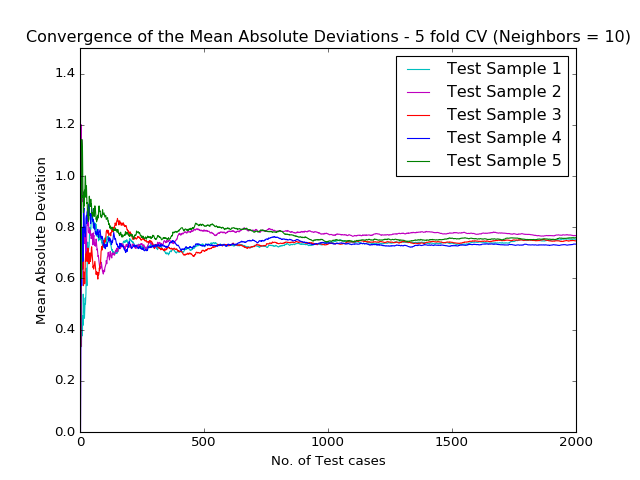

In [24]:
fig = plt.figure()

plt.axis((0,2000,0,1.5))
plt.xlabel('No. of Test cases')
plt.ylabel('Mean Absolute Deviation')
plt.title('Convergence of the Mean Absolute Deviations - 5 fold CV (Neighbors = 10)')

plt.plot(mad_inst_n10[0], 'c-',label='Test Sample 1')
plt.plot(mad_inst_n10[1], 'm-',label='Test Sample 2')
plt.plot(mad_inst_n10[2], 'r-',label='Test Sample 3')
plt.plot(mad_inst_n10[3], 'b-',label='Test Sample 4')
plt.plot(mad_inst_n10[4], 'g-',label='Test Sample 5')

plt.legend(loc='upper right')


In [ ]:
######################### Number of neighbors = 20
mad_n20 = np.zeros(5)
for j in range(0,5):
  for i in range(0,2000):
    mad_n20[j] = mad_n20[j] + abs(predicted_n20[j,i] - expected[j,i] )

  mad_n20[j] = mad_n20[j]/2000


mad_inst_n20 = np.zeros((5,2000))
for k in range(0,5):  
  for j in range(0,2000):
      for i in range(0,j):
         mad_inst_n20[k,j] = mad_inst_n20[k,j] + abs(predicted_n20[k,i] - expected[k,i] )

      mad_inst_n20[k,j] = mad_inst_n20[k,j]/j


<IPython.core.display.Javascript object>


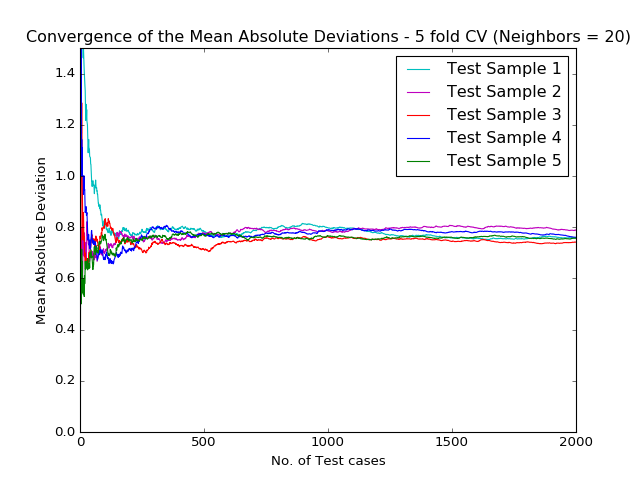

In [25]:
fig = plt.figure()

plt.axis((0,2000,0,1.5))
plt.xlabel('No. of Test cases')
plt.ylabel('Mean Absolute Deviation')
plt.title('Convergence of the Mean Absolute Deviations - 5 fold CV (Neighbors = 20)')

plt.plot(mad_inst_n20[0], 'c-',label='Test Sample 1')
plt.plot(mad_inst_n20[1], 'm-',label='Test Sample 2')
plt.plot(mad_inst_n20[2], 'r-',label='Test Sample 3')
plt.plot(mad_inst_n20[3], 'b-',label='Test Sample 4')
plt.plot(mad_inst_n20[4], 'g-',label='Test Sample 5')

plt.legend(loc='upper right')

In [ ]:
########################### Neighbors = 30
mad_n30 = np.zeros(5)
for j in range(0,5):
  for i in range(0,2000):
    mad_n30[j] = mad_n30[j] + abs(predicted_n30[j,i] - expected[j,i] )

  mad_n30[j] = mad_n30[j]/2000


mad_inst_n30 = np.zeros((5,2000))
for k in range(0,5):  
  for j in range(0,2000):
      for i in range(0,j):
         mad_inst_n30[k,j] = mad_inst_n30[k,j] + abs(predicted_n30[k,i] - expected[k,i] )

      mad_inst_n30[k,j] = mad_inst_n30[k,j]/j


<IPython.core.display.Javascript object>


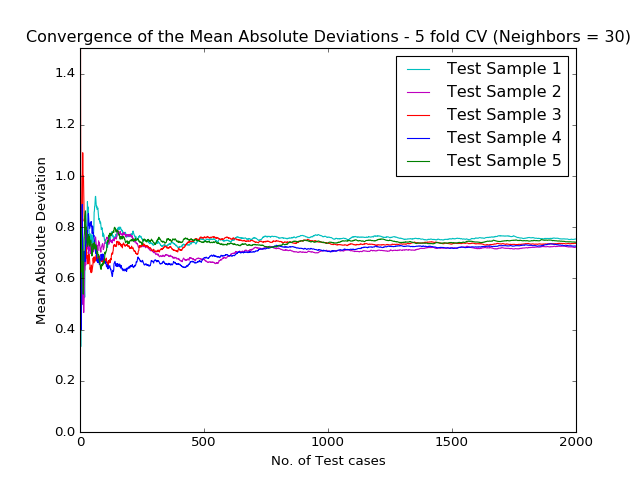

In [27]:
fig = plt.figure()

plt.axis((0,2000,0,1.5))
plt.xlabel('No. of Test cases')
plt.ylabel('Mean Absolute Deviation')
plt.title('Convergence of the Mean Absolute Deviations - 5 fold CV (Neighbors = 30)')

plt.plot(mad_inst_n30[0], 'c-',label='Test Sample 1')
plt.plot(mad_inst_n30[1], 'm-',label='Test Sample 2')
plt.plot(mad_inst_n30[2], 'r-',label='Test Sample 3')
plt.plot(mad_inst_n30[3], 'b-',label='Test Sample 4')
plt.plot(mad_inst_n30[4], 'g-',label='Test Sample 5')

plt.legend(loc='upper right')

In [ ]:
################################ Neighbors = 50 
mad_n50 = np.zeros(5)
for j in range(0,5):
  for i in range(0,2000):
    mad_n50[j] = mad_n50[j] + abs(predicted_n50[j,i] - expected[j,i] )

  mad_n50[j] = mad_n50[j]/2000


mad_inst_n50 = np.zeros((5,2000))
for k in range(0,5):  
  for j in range(0,2000):
      for i in range(0,j):
         mad_inst_n50[k,j] = mad_inst_n50[k,j] + abs(predicted_n50[k,i] - expected[k,i] )

      mad_inst_n50[k,j] = mad_inst_n50[k,j]/j

<IPython.core.display.Javascript object>


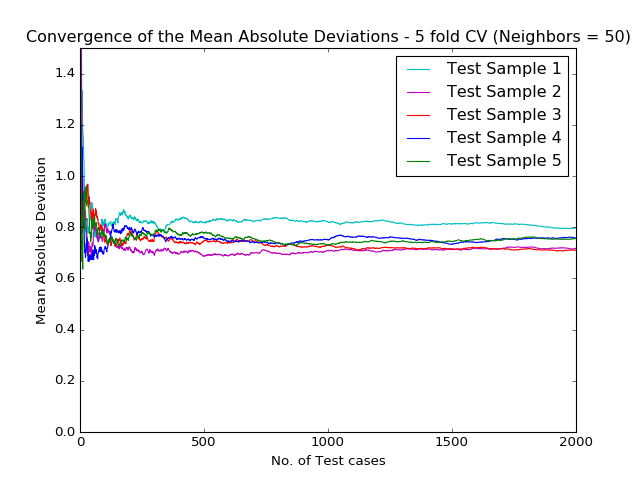

In [28]:
fig = plt.figure()

plt.axis((0,2000,0,1.5))
plt.xlabel('No. of Test cases')
plt.ylabel('Mean Absolute Deviation')
plt.title('Convergence of the Mean Absolute Deviations - 5 fold CV (Neighbors = 50)')

plt.plot(mad_inst_n50[0], 'c-',label='Test Sample 1')
plt.plot(mad_inst_n50[1], 'm-',label='Test Sample 2')
plt.plot(mad_inst_n50[2], 'r-',label='Test Sample 3')
plt.plot(mad_inst_n50[3], 'b-',label='Test Sample 4')
plt.plot(mad_inst_n50[4], 'g-',label='Test Sample 5')

plt.legend(loc='upper right')

<IPython.core.display.Javascript object>


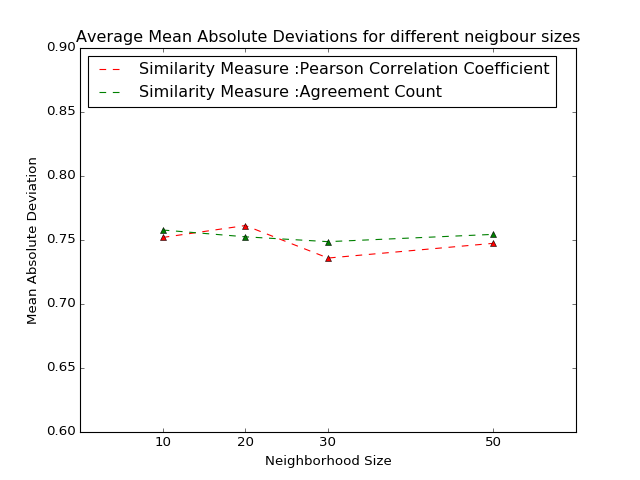

In [41]:
############## Comparison of the average MAD for different neigbour sizes
f = plt.figure(4)

plt.ylim(0.6, 0.9)
plt.xlim(0,60)
plt.xlabel('Neighborhood Size')
plt.ylabel('Mean Absolute Deviation')
plt.title('Average Mean Absolute Deviations for different neigbour sizes')


##### Average Mean Absolute Deviations a function of the value of neigbour size - PCC
plt.plot([10,20,30,50],[np.mean(mad_n10),np.mean(mad_n20),np.mean(mad_n30),np.mean(mad_n50)],'r--',\
         label = 'Similarity Measure :Pearson Correlation Coefficient')
plt.plot([10,20,30,50],[np.mean(mad_n10),np.mean(mad_n20),np.mean(mad_n30),np.mean(mad_n50)],'r^')

##### Average Mean Absolute Deviations a function of the value of neigbour size - New
plt.plot([10,20,30,50],[np.mean(mad_n10n),np.mean(mad_n20n),np.mean(mad_n30n),np.mean(mad_n50n)],'g--',\
         label = 'Similarity Measure :Agreement Count')
plt.plot([10,20,30,50],[np.mean(mad_n10n),np.mean(mad_n20n),np.mean(mad_n30n),np.mean(mad_n50n)],'g^')

plt.xticks(list([10,20,30,50]))
plt.legend(loc='upper left')

f.show()